In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib.pyplot as plt
import numpy as nmp

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.006442773698145,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005102583402028,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.00500685241788,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Аладдин], \n, [(1992)]...",8.004989589838072,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [9]:
data.crew[5]

'Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.











Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


# Решения

### Задание 1

In [10]:
def find_list_crew(m): 
    m = m.split(',')
    res = [x.replace(r'(dir.)', '') for x in m]
    res = [x.strip() for x in res]
    return res

In [11]:
old_w_dir = data.copy(deep=True) #сохраним копию с "dir." для второго задания

data['crew'] = data.crew.apply(find_list_crew)
data

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235294728575104,"[Frank Darabont, Tim Robbins, Morgan Freeman]",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156163976919544,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.98960502345779,"[Christopher Nolan, Christian Bale, Heath Ledger]",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984051803301583,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951091683269263,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",/title/tt0050083/,12 рaзгневанных мужчин,1957
...,...,...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.006442773698145,"[Akira Kurosawa, Maksim Munzuk, Yuriy Solomin]",/title/tt0071411/,Дерсу Узала,1975
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005102583402028,"[Brad Bird, Eli Marienthal, Harry Connick Jr.]",/title/tt0129167/,Стальной гигант,1999
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.00500685241788,"[Tate Taylor, Viola Davis, Emma Stone]",/title/tt1454029/,Прислуга,2011
248,"[\n 249.\n , [Аладдин], \n, [(1992)]...",8.004989589838072,"[Ron Clements, Scott Weinger, Robin Williams]",/title/tt0103639/,Аладдин,1992


In [12]:
full_crews_members_list = []

for i in range(data.crew.shape[0]):
    full_crews_members_list.extend(data.crew[i])
    
unique_members = set(full_crews_members_list)

print(f'Всего имен в списке: {len(full_crews_members_list)}')

print(f'Количество уникальных актеров и режиссеров: {len(unique_members)}')

Всего имен в списке: 750
Количество уникальных актеров и режиссеров: 527


### Задание 2

In [13]:
def get_directors(d):
    d = d.split(',')
    res = [x.strip() for x in d]
    for x in res:
        if r'(dir.)' in x:
            x = str(x.replace(r'(dir.)', ''))
            x = x.strip()
            return x

In [14]:
old_w_dir['directors'] = old_w_dir.crew.apply(get_directors)

In [15]:
directors = set(old_w_dir['directors'])
print(f'Количество уникальных директоров {len(directors)}')

Количество уникальных директоров 154


In [16]:
dir_films = dict()
for director in list(directors):
    dir_films[director] = list(old_w_dir['directors'].values).count(director)

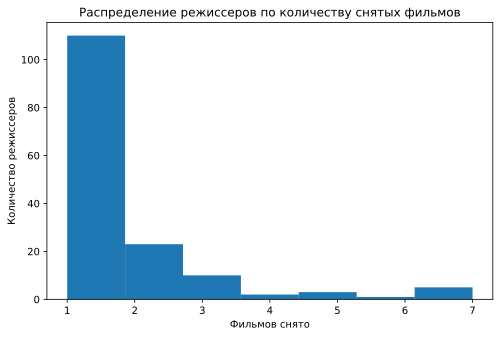

In [17]:
plt.hist(list(dir_films.values()), bins=7)
plt.title('Распределение режиссеров по количеству снятых фильмов')
plt.xlabel('Фильмов снято')
plt.ylabel('Количество режиссеров')
plt.show()

In [18]:
print(r'Больше всего фильмов у этих режиссеров:')
for key, value in dir_films.items():
    if value > 3:
        print(f'{key}: {value} фильмов')

Больше всего фильмов у этих режиссеров:
Quentin Tarantino: 5 фильмов
Charles Chaplin: 5 фильмов
Steven Spielberg: 7 фильмов
Hayao Miyazaki: 4 фильмов
Stanley Kubrick: 7 фильмов
Martin Scorsese: 7 фильмов
Sergio Leone: 4 фильмов
Alfred Hitchcock: 6 фильмов
Akira Kurosawa: 7 фильмов
Billy Wilder: 5 фильмов
Christopher Nolan: 7 фильмов


### Задание 3

In [19]:
unique_actors = set(unique_members) - set(directors)
print(len(unique_actors))

373


In [20]:
list_of_all = []
for x in data.crew.values:
    list_of_all.extend(x)

actors_dict = {}
for actor in unique_actors:
    actors_dict[actor] = list_of_all.count(actor)

In [21]:
sorted_actors = {k: v for k, v in sorted(actors_dict.items(), key=lambda item: item[1], reverse= True)}
for x in list(sorted_actors)[:10]:
    print(f'{x} сыграл в {sorted_actors[x]} фильмах из топа')

Robert De Niro сыграл в 9 фильмах из топа
Harrison Ford сыграл в 6 фильмах из топа
Tom Hanks сыграл в 6 фильмах из топа
Leonardo DiCaprio сыграл в 5 фильмах из топа
Christian Bale сыграл в 5 фильмах из топа
Al Pacino сыграл в 4 фильмах из топа
Toshirô Mifune сыграл в 4 фильмах из топа
James Stewart сыграл в 4 фильмах из топа
Brad Pitt сыграл в 4 фильмах из топа
Matt Damon сыграл в 4 фильмах из топа


### Задание 4

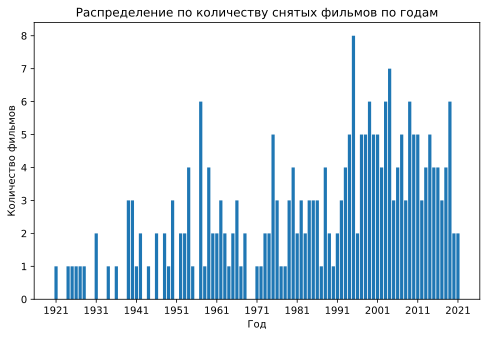

In [22]:
first_year = min(data.year.values.astype(int))

last_year = max(data.year.values.astype(int))

num_of_bins = last_year - first_year

all_years = list(range(first_year, last_year))

year_films = dict()

for year in all_years:
    year_films[str(year)] = list(data.year.astype(int)).count(year)

plt.bar(year_films.keys(), year_films.values())
plt.title('Распределение по количеству снятых фильмов по годам')
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.xticks(nmp.arange(0, num_of_bins, 10))
plt.show()

### Задание 5

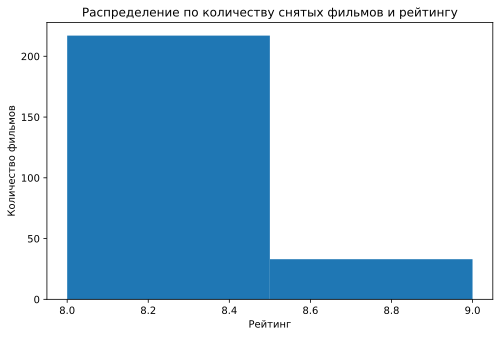

In [23]:
#целые

rating = data.ratings.values.astype(float).round(0)
plt.hist(list(rating), bins = 2)
plt.title('Распределение по количеству снятых фильмов и рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

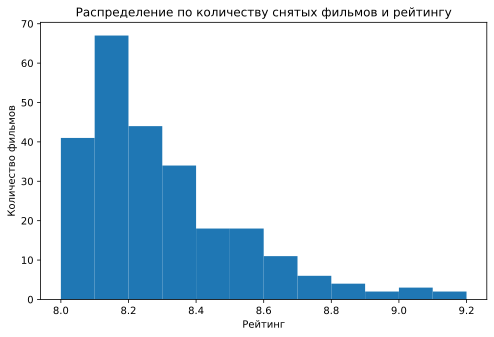

In [24]:
#десятые

rating_2 = data.ratings.values.astype(float).round(1)
num_bin = len(set(rating_2))
plt.hist(list(rating_2), bins = num_bin)
plt.title('Распределение по количеству снятых фильмов и рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

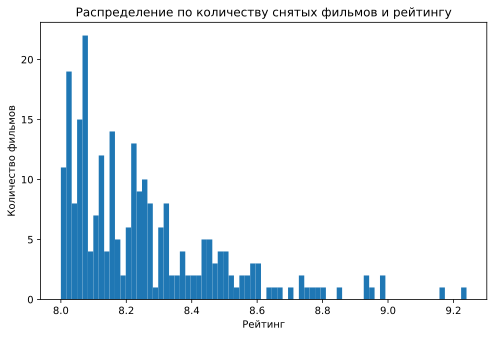

In [25]:
# сотые

rating_3 = data.ratings.values.astype(float).round(2)
num_bin = len(set(rating_3))
plt.hist(list(rating_3), bins = num_bin)
plt.title('Распределение по количеству снятых фильмов и рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

### Задание 6

In [26]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

def get_description(link):
    base_url = "https://www.imdb.com"
    film_url = base_url + link
    result = requests.get(film_url, headers=headers)
    html_text = result.text
    soup = BeautifulSoup(html_text, 'lxml')
    describe = soup.find_all(attrs={"name": "description"})[0].get("content")
    return describe

In [27]:
data['plot'] = data.links.apply(get_description)

In [28]:
data['plot']

0      Побег из Шоушенка: Directed by Frank Darabont....
1      Крёстный отец: Directed by Francis Ford Coppol...
2      Темный рыцарь: Directed by Christopher Nolan. ...
3      Крёстный отец 2: Directed by Francis Ford Copp...
4      12 рaзгневанных мужчин: Directed by Sidney Lum...
                             ...                        
245    Дерсу Узала: Directed by Akira Kurosawa. With ...
246    Стальной гигант: Directed by Brad Bird. With J...
247    Прислуга: Directed by Tate Taylor. With Emma S...
248    Аладдин: Directed by Ron Clements, John Musker...
249    Ганди: Directed by Richard Attenborough. With ...
Name: plot, Length: 250, dtype: object

### Задание 7

In [29]:
def actors_from_description(description):
    return description.lower().split('with')[1].split('.')[0].strip()

In [30]:
data['actors_description'] = data['plot'].apply(actors_from_description)

In [31]:
data['actors_description'][1:20]

1       marlon brando, al pacino, james caan, richard s
2     christian bale, heath ledger, aaron eckhart, m...
3     al pacino, robert duvall, diane keaton, robert...
4                    martin balsam, john fiedler, lee j
5     liam neeson, ben kingsley, ralph fiennes, caro...
6      noel appleby, ali astin, sean astin, david aston
7     tim roth, amanda plummer, laura lovelace, john...
8     alan howard, noel appleby, sean astin, sala baker
9     eli wallach, clint eastwood, lee van cleef, al...
10    tom hanks, rebecca williams, sally field, mich...
11    edward norton, brad pitt, meat loaf, zach grenier
12    bruce allpress, sean astin, john bach, sala baker
13    leonardo dicaprio, joseph gordon-levitt, ellio...
14    mark hamill, harrison ford, carrie fisher, bil...
15    keanu reeves, laurence fishburne, carrie-anne ...
16    robert de niro, ray liotta, joe pesci, lorrain...
17               michael berryman, peter brocco, dean r
18    morgan freeman, andrew kevin walker, danie

### Задание 8

In [32]:
url = r'http://www.imdb.com/chart/top'

result = requests.get(url, headers=headers)
top_text = result.text
top_soup = BeautifulSoup(top_text, 'lxml')
rate = top_soup.find_all(attrs={'class': 'ratingColumn imdbRating'})

numbers_of_assesment = []
for x in rate:
    numbers_of_assesment.append(int(str(x.contents[1]).split(' user')[0].split('on ')[-1].replace(',','')))
    
data['gr'] = pd.Series(numbers_of_assesment)

sorted_assesments = sorted(numbers_of_assesment, reverse=True)
top_10 = sorted_assesments[:10]

n = 0

for t in top_10:
    n += 1
    need = data[data['gr'] == t]
    print(f'{n}. {list(need.title)[0]} набрал {list(need.gr)[0]} оценок')

1. Побег из Шоушенка набрал 2672223 оценок
2. Темный рыцарь набрал 2645081 оценок
3. Начало набрал 2344567 оценок
4. Бойцовский клуб набрал 2117660 оценок
5. Форрест Гамп набрал 2072138 оценок
6. Криминальное чтиво набрал 2047231 оценок
7. Матрица набрал 1908661 оценок
8. Властелин колец: Братство кольца набрал 1870868 оценок
9. Крёстный отец набрал 1851996 оценок
10. Властелин колец: Возвращение короля набрал 1841614 оценок


### Задание 9

### Задание 10